# <center> Série Temporal com Covid-19 </center>
## Professor: Victor Venites
## Data: 11/04/2020
## Aula: Especial 04
## Escola Livre de IA

## 1. Importando as Bibliotecas de Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Carregando as bases de Dados
- Você pode usar comandos do prompt de comando direto no jupyter

In [2]:
!dir

 O volume na unidade C ‚ Acer
 O N£mero de S‚rie do Volume ‚ AA03-647E

 Pasta de C:\Users\VictorVenites\Desktop\Escola_Livre_de_IA\Especial_2020.04.11_SerieTemporal_Covid19\Projeto_Aula

11/04/2020  18:32    <DIR>          .
11/04/2020  18:32    <DIR>          ..
04/04/2020  03:44    <DIR>          .ipynb_checkpoints
11/04/2020  18:32           165.615 AulaEspecial04_SerieTemporal_Covid19_Prof.VictorVenites_EscolaLivreIA_Python.ipynb
07/04/2020  20:15               335 Jupyter_Python.bat
11/04/2020  18:32            49.961 Resultado_AulaEspecial04_Prof.VictorVenites.jpg
11/04/2020  15:12            65.331 time_series_covid19_confirmed_global.csv
11/04/2020  15:12            52.985 time_series_covid19_deaths_global.csv
11/04/2020  15:12            55.120 time_series_covid19_recovered_global.csv
               6 arquivo(s)        389.347 bytes
               3 pasta(s)   768.734.990.336 bytes dispon¡veis


In [3]:
pwd

'C:\\Users\\VictorVenites\\Desktop\\Escola_Livre_de_IA\\Especial_2020.04.11_SerieTemporal_Covid19\\Projeto_Aula'

In [4]:
DataFrame = pd.read_csv("time_series_covid19_confirmed_global.csv")
DataFrame.iloc[:3, :5]

,Province/State,Country/Region,Lat,Long,1/22/20
0,NaN,Afghanistan,33.0000,65.0000,0
1,NaN,Albania,41.1533,20.1683,0
2,NaN,Algeria,28.0339,1.6596,0


## 3. Análise Exploratória

In [5]:
DataFrame.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,3532.594697,3838.886364,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,17859.555003,19711.027486,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,19.000000,20.000000,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,165.500000,172.500000,183.000000,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,779.500000,873.000000,943.000000,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,213372.000000,243762.000000,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000


In [6]:
Serie_Temporal = DataFrame.copy()
Serie_Temporal.drop(columns = ["Province/State", "Country/Region", "Lat", "Long"], inplace = True)
Serie_Temporal.iloc[:3, :3]

,1/22/20,1/23/20,1/24/20
0,0,0,0
1,0,0,0
2,0,0,0


## 4. Juntando tudo em 1 série Temporal

In [7]:
Serie_Geral = Serie_Temporal.sum().copy()
Serie_Geral = pd.DataFrame(Serie_Geral)
Serie_Geral.rename(columns = {0 : "y"}, inplace = True)
Serie_Geral.head()

,y
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118


## 5. Todos a Partir do Tempo 0

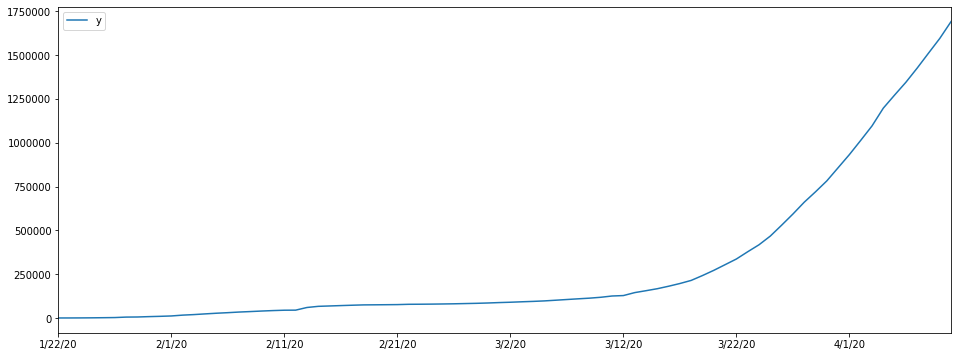

In [8]:
Serie_Geral.plot(figsize = (16,6))
plt.show()

In [9]:
Serie_Geral.index = pd.to_datetime(Serie_Geral.index)
Serie_Geral.info()

In [11]:
tempos = list(range(Serie_Geral.shape[0]))
Serie_Geral["tempos"] = tempos
Serie_Geral.head()

,y,tempos
2020-01-22,555,0
2020-01-23,654,1
2020-01-24,941,2
2020-01-25,1434,3
2020-01-26,2118,4


In [12]:
Serie_Geral['Dia'] = Serie_Geral.index.day
Serie_Geral['Dia_da_Semana'] = Serie_Geral.index.dayofweek
# 0 até 6 -> Onde zero é a Segunda
Serie_Geral.tail()

,y,tempos,Dia,Dia_da_Semana
2020-04-06,1345101,75,6,0
2020-04-07,1426096,76,7,1
2020-04-08,1511104,77,8,2
2020-04-09,1595350,78,9,3
2020-04-10,1691719,79,10,4


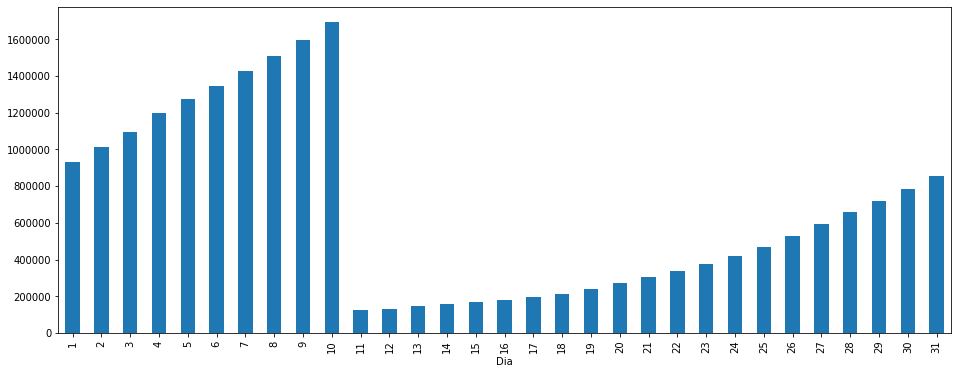

In [13]:
Serie_Geral.groupby('Dia')["y"].max().plot.bar(figsize = (16,6))

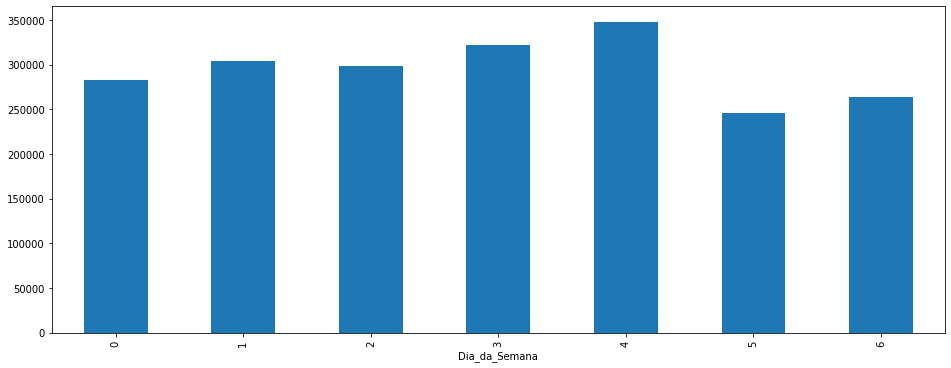

In [14]:
Serie_Geral.groupby('Dia_da_Semana')["y"].mean().plot.bar(figsize = (16,6))

In [16]:
Serie_Geral.shape[0]

80

In [17]:
dummies_Dia_Semana = pd.get_dummies(Serie_Geral["Dia_da_Semana"], drop_first = True)
Serie_Geral = pd.concat([Serie_Geral, dummies_Dia_Semana], axis = 1)
dummies_Dia = pd.get_dummies(Serie_Geral["Dia"], drop_first = True)
Serie_Geral = pd.concat([Serie_Geral, dummies_Dia], axis = 1)
Serie_Geral.drop(columns = 31, inplace = True)
Serie_Geral.iloc[:3, :]

,y,tempos,Dia,Dia_da_Semana,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
2020-01-22,555,0,22,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-23,654,1,23,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2020-01-24,941,2,24,4,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
Serie_Geral["Anterior"] = Serie_Geral["y"].shift(5)
Serie_Geral = Serie_Geral.iloc[5:]
Serie_Geral.head()

,y,tempos,Dia,Dia_da_Semana,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,Anterior
2020-01-27,2927,5,27,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,555.0
2020-01-28,5578,6,28,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,654.0
2020-01-29,6166,7,29,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,941.0
2020-01-30,8234,8,30,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1434.0
2020-01-31,9927,9,31,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2118.0


## 6. Previsão da Série por Soma Cumulativa

In [20]:
Taxa_Treino = 0.8
X_Treino = Serie_Geral.iloc[:round(Serie_Geral.shape[0] * Taxa_Treino), 1:]
X_Teste = Serie_Geral.iloc[round(Serie_Geral.shape[0] * Taxa_Treino):, 1:]

Y_Treino = Serie_Geral.iloc[:round(Serie_Geral.shape[0] * Taxa_Treino), 0]
Y_Teste = Serie_Geral.iloc[round(Serie_Geral.shape[0] * Taxa_Treino):, 0]
len(Y_Teste)

15

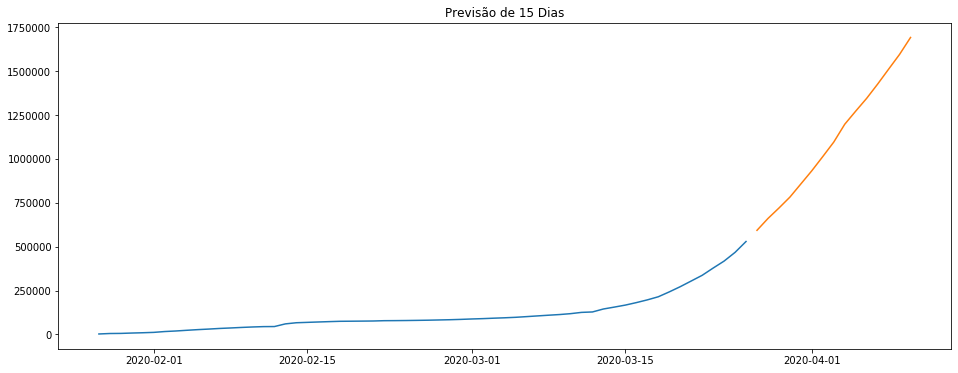

In [21]:
plt.figure(figsize = (16,6))
plt.title(f"Previsão de {len(Y_Teste)} Dias")
plt.plot(Y_Treino)
plt.plot(Y_Teste)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
modelo = LinearRegression().fit(X_Treino, Y_Treino)
modelo.score(X_Treino, Y_Treino)

0.9908783813785254

In [24]:
modelo.coef_, modelo.intercept_

(array([-3.65666944e+03,  5.01509963e+02, -1.81487302e+03,  9.22282436e+02,
        -1.96403425e+03, -9.89399539e+03, -5.84853357e+03,  2.41798784e+03,
         7.02951572e+03, -1.61374629e+03,  3.09470860e+02,  4.88533465e+03,
         1.37882753e+04,  1.83530455e+04,  1.21848614e+04,  6.65675542e+03,
         1.59961369e+03, -1.47845468e+03, -1.93525219e+02,  1.56880086e+03,
         1.56549735e+04,  1.42229978e+04,  9.44047702e+03,  5.18534773e+03,
         1.18246617e+04, -1.45604750e+04, -1.29847007e+04, -8.74777768e+03,
        -1.49545364e+04, -2.24486199e+04, -2.75918067e+04, -4.29142572e+04,
        -5.14959946e+04, -5.30062272e+04, -2.70834701e+04, -2.32274288e+04,
        -2.08758974e+04, -8.16270089e+02,  2.63348040e+00]), 34820.53028845774)

In [25]:
Previsto = modelo.predict(X_Teste)
Previsto = Previsto.round()
df_Previsao = X_Teste.copy()
df_Previsao[0] = Previsto
df_Previsao = df_Previsao.loc[:, 0]
df_Previsao

2020-03-27     657845.0
2020-03-28     773713.0
2020-03-29     880545.0
2020-03-30    1031951.0
2020-03-31    1191832.0
2020-04-01    1336182.0
2020-04-02    1499170.0
2020-04-03    1656721.0
2020-04-04    1828525.0
2020-04-05    2034838.0
2020-04-06    2237929.0
2020-04-07    2440659.0
2020-04-08    2644408.0
2020-04-09    2893725.0
2020-04-10    3086462.0
Name: 0, dtype: float64

### 6.1. MAPE será nossa medida de Erro alem do Score da Regressão

In [26]:
# Percentual de Erro da Média Absoluta
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true) + 1
    y_pred = np.array(y_pred) + 1
    # Add +1 para evitar divisão por zero
    return np.mean(np.abs((y_true - y_pred) / y_true))
# Quanto menor, melhor

In [27]:
# MAPE => Mean Absolute Percentage Error
Erro_Treino = mean_absolute_percentage_error(Y_Treino.values.reshape(-1, 1), modelo.predict(X_Treino).reshape(-1, 1))
Erro_Treino = round(Erro_Treino * 100, 2)
Erro_Teste = mean_absolute_percentage_error(Y_Teste.values, df_Previsao.values)
Erro_Teste = round(Erro_Teste * 100, 2)
Score_Bonito = round(modelo.score(X_Treino, Y_Treino), 4) * 100

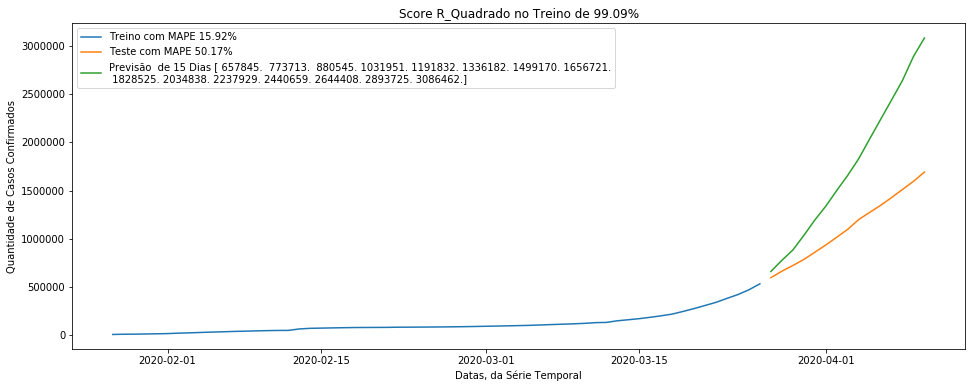

In [28]:
plt.figure(figsize = (16,6))
plt.title(f"Score R_Quadrado no Treino de {Score_Bonito}%")
plt.plot(Y_Treino)
plt.plot(Y_Teste)
plt.plot(df_Previsao)
plt.legend([f"Treino com MAPE {Erro_Treino}%"
            , f"Teste com MAPE {Erro_Teste}%"
            , f"Previsão  de {len(Y_Teste)} Dias {df_Previsao.values}"])
plt.xlabel("Datas, da Série Temporal")
plt.ylabel("Quantidade de Casos Confirmados")
plt.savefig("Resultado_AulaEspecial04_Prof.VictorVenites.jpg")
plt.show()